<b>Overview</b>

    In this practical, we were to use Python to create a Jupyter Notebook to analyse a large amount of 
    data in the form of a csv file (census2011.csv). Using pandas and matplotlib, we had to check that 
    the data was consistent, creating a new file of refined data if it wasn't, display some data 
    analysis (number of records, number of records per variable, types of variables, etc.), and build 
    bar charts and pie charts of given variables. The extensions were also all implemented by us, 
    except the last hard one, which was to use virtualisation tools to provide an environment to run 
    our programme. The rest, which we implemented, were: to build tables based on 2 variables (easy), 
    to build 3d plots based on these tables (medium), to perform queries using pandas (easy - e.g. 
    placing a restriction on the value for Economic Activity), to use ipywidgets to display number of 
    records for the selected values of two variables (medium), to create a map which displays the 
    regions, which the user could select to display a pie chart for, based on a given variable (hard) 
    and to try different data sets from other websites, with at least 10,000 records (hard). 
    
    The implementations and further decision explanations can be found below in the following cells. In 
    general, a cell contains 1 or more function implementations, and is followed by one or more cells 
    using these functions. 

This cell contains all the functions used to go through a csv file using pandas, and check whether its data is consistent. If it isn't, a "refined_data.csv" file is created with the refined data. A data array variable is used to hold the information of a given csv (which can be changed for other data files), where each item of the list is a tuple, where the first variable contains the variable name, and the second is a list containing its possible values.
Most of the following functions, in the whole programme, take an argument 'df', which is the dataframe
that should be used to carry out the functionality.
    
    - check_consistency_col:
        this function takes in two arrays, and returns false if the first array contains an item that isn't in 
        the second array. It is used to check that a list is legal (the 2nd array contains the legal items)
        
    - check:
        this function takes in an array of possible legal values, and using the above function, it checks all of 
        the items in the csv file against this array. 
    
    - check_val:
        this is a similar function to check_consistency_col, except it checks that a single value is legal rather
        than an array. It is used when re-writing the data to refine it, as each value needs to be checked. 
    
    - check_file:
        this function checks the whole file, by using the check function, and passing the data array as a 
        parameter.
        In this way, only by changing the initial file and a data array, any big csv file can be checked. If check
        fails, we go through the data value by value, adding it onto a row only if all the values in the given row
        are legal (which can sometimes take a while as each value needs to be checked). The row is then written 
        on to the new file. To check the ID field, the function simply checks that it is unique, accepting any 
        value as an ID, as different files may use different approaches to IDs. When using these functions with 
        other files, the legal data array for the ID field should be left empty, otherwise it will be treated 
        as another field. 

In [66]:
import pandas as pd

refined_file = open("../data/refined_data.csv", "w+")
FILENAME = "../data/census2011.csv"
DATA_ARRAY = [('Person ID', []),
              ('Region', ["E12000001", "E12000002", "E12000003",
                          "E12000004", "E12000005", "E12000006",
                          "E12000007", "E12000008", "E12000009", "W92000004"]),
              ('Residence Type', ["C", "H"]),
              ('Family Composition', [-9, 1, 2, 3, 4, 5, 6]),
              ('Population Base', list(range(1, 4))),
              ('Sex', [1, 2]),
              ('Age', list(range(1, 9))),
              ('Marital Status', list(range(1, 6))),
              ('Student', [1, 2]),
              ('Country of Birth', [-9, 1, 2]),
              ('Health', [-9] + list(range(1, 6))),
              ('Ethnic Group', [-9] + list(range(1, 6))),
              ('Religion', [-9] + list(range(1, 10))),
              ('Economic Activity', [-9] + list(range(1, 10))),
              ('Occupation', [-9] + list(range(1, 10))),
              ('Industry', [-9] + list(range(1, 13))),
              ('Hours worked per week', [-9] + list(range(1, 5))),
              ('Approximated Social Grade', [-9] + list(range(1, 5)))]

TEXT_ARRAY = [('Person ID', []),
              ('Region', ["North East", "North West","Yorkshire and the Humber", "East Midlands", 
                          "West Midlands","East of England", "London","South East", "South West", 
                          "Wales"]),
              ('Residence Type', ["Resident in a communal establishment", 
                                  "Not resident in a communal establishment"]),
              ('Family Composition', ["Not in a family", 
                                      "Married/same-sex civil partnership",
                                      "Cohabiting couple",
                                      "Lone parent family (male head)",
                                      "Lone parent family (female head)",
                                      "Other",
                                      "No code required"]),
              ('Population Base', ["Usual resident", 
                                   "Student living away from home",
                                   "Short-term resident"]),
              ('Sex', ["Male", "Female"]),
              ('Age', ["0 to 15", 
                       "16 to 24",
                       "25 to 34",
                       "35 to 44",
                       "45 to 54",
                       "55 to 64",
                       "65 to 74", 
                       "75 and over"]),
              ('Marital Status', ["Single", 
                                  "Married",
                                  "Separated but married",
                                  "Divorced",
                                  "Widowed"]),
              ('Student', ["Student", "Not a student"]),
              ('Country of Birth', ["UK", "Non UK", "No Code required"]),
              ('Health', ["Very good health", 
                          "Good health",
                          "Fair health",
                          "Bad health",
                          "Very bad health", 
                          "No code required"]),
              ('Ethnic Group', ["White", 
                                "Mixed",
                                "Asian and Asian British",
                                "Black or Black British",
                                "Chinese or Other", 
                                "No code required"]),
              ('Religion', ["No religion", 
                            "Christian",
                            "Buddhist",
                            "Hindu",
                            "Jewish", 
                            "Muslim",
                            "Sikh",
                            "Other",
                            "Not stated",
                            "No code required"]),
              ('Economic Activity', ["Employed",
                                     "Self-employed",
                                     "Unemployed",
                                     "Full-time student",
                                     "Retired",
                                     "Student",
                                     "Looking after home or family",
                                     "Long-term sick or disabled",
                                     "Other",
                                     "No code required"]),
              ('Occupation', ["Managers",
                              "Professional",
                              "Associate Professional and Technical",
                              "Administrative",
                              "Skilled Trades",
                              "Caring, Leisure and Other",
                              "Sales",
                              "Process",
                              "Elementary",
                              "No code required"]),
              ('Industry', ["Agriculture", 
                            "Manufacturing",
                            "Construction", 
                            "Wholesale and retail trade",
                            "Accommodation",
                            "Transport and storage",
                            "Financial",
                            "Real estate",
                            "Public administration",
                            "Education",
                            "Human health",
                            "Other community",
                            "No code required"]),
              ('Hours worked per week', ["Part-time: 15 or less hours worked", 
                                         "Part-time: 16 to 30 hours worked", 
                                         "Full-time: 31 to 48 hours worked", 
                                         "Full-time: 49 or more hours worked", 
                                         "No code required"]),
              ('Approximated Social Grade', ["AB", "C1", "C2", "DE", "No code required"])]


def check_consistency_col(array_of_values, array_of_legal_values):
    if not type(array_of_legal_values) == list:
        print(str(type(array_of_values)) + " " + str(type(array_of_legal_values)))
        print("Invalid arguments for check_consistency_col. Arguments need to be lists of values. ")
        return
    for item in array_of_values:
        if item not in array_of_legal_values:
            return False
    return True


def check(array_of_values, df):
    for (x, y) in array_of_values:
        if not type(x) == str or not type(y) == list:
            print("Invalid arguments for check. Arguments need to be an array of tuples, where each tuple "
                  "contains a String followed by a list of legal values for the row with the given String.")
            return
        if y:
            if not check_consistency_col(df[x].unique(), y):
                return False
    return True


def check_val(value, array_of_values):
    if not type(array_of_values) == list:
        print("Invalid arguments for check_val. Second argument needs to be a list of values to compare with the "
              "first value.")
        return
    if value not in array_of_values:
        return False
    return True


def check_file(array_of_values, df):
    if not type(array_of_values) == list:
        print("Invalid arguments for check_file. Arguments need to be an array of tuples, where each tuple "
              "contains a String followed by a list of legal values for the row with the given String.")
        return
    flag = True
    if not check(array_of_values, df):
        flag = False
    else:
        print("All records are legal - no new file needed \n\n")

    final_row = ""
    ID = []
    counter = 0

    if not flag:
        for (x, y) in array_of_values:
            if not type(x) == str or not type(y) == list:
                print("Invalid arguments for check_file. Arguments need to be an array of tuples, where each tuple "
                      "contains a String followed by a list of legal values for the row with the given String.")
                return
            if counter != 0:
                refined_file.write(',')
            refined_file.write(str(x))
            counter += 1
        refined_file.write('\n')
        for index, row in df.iterrows():
            flag = True
            for (x, y) in array_of_values:
                # check if array is empty (if so, we are dealing with ID)
                if not y:
                    # check if the ID is unique
                    if row[x] not in ID:
                        final_row += str(row[x]) + ','
                        ID += x
                    else:
                        flag = False
                        break
                else:
                    # check that current value in row is correct
                    if not check_val(row[x], y):
                        flag = False
                        break
                    else:
                        final_row += str(row[x]) + ','
            if flag:
                refined_file.write(final_row + '\n')
            final_row = ""
        print("New file created with refined data")

The following instructions read a new file in, and check the csv file to see if it is valid. Here, a differend file, 'censusmini.csv' is used, contaning just 23 records, the first of which is invalid. This is a test to make sure that the invalid row is spotted, and the new refined_data file is created, without the first row. 

In [67]:
df = pd.read_csv("../data/censusmini.csv")
check_file(DATA_ARRAY, df)

New file created with refined data


The following instructions read the actual census2011.csv file in, to ensure that it is legal. 

In [68]:
df = pd.read_csv(FILENAME)
check_file(DATA_ARRAY, df)

All records are legal - no new file needed 




This function solves the 2nd part of the basic requirements, which is to analyse the given data. It prints out the number of records, data breakdown (the type of each variable), and the number of records for each variable value. 

In [69]:
def data_analysis(array_of_values, FILENAME, df):
    number_of_rows = sum(1 for row in open(FILENAME)) - 1
    print("Number of Records: %d \n \n" % number_of_rows)

    print("Data Type Breakdown: \n\n%s\n\n" % df.dtypes)

    print("Number of Each Data Type:\n")
    counter = 0
    for (x, y) in array_of_values:
        if counter > 0:
            print(df.groupby(df[x]).size())
        counter += 1
        print("")

This cell simply runs the data analysis for census2011.csv. 

In [70]:
data_analysis(DATA_ARRAY, FILENAME, df)

Number of Records: 569741 
 

Data Type Breakdown: 

Person ID                     int64
Region                       object
Residence Type               object
Family Composition            int64
Population Base               int64
Sex                           int64
Age                           int64
Marital Status                int64
Student                       int64
Country of Birth              int64
Health                        int64
Ethnic Group                  int64
Religion                      int64
Economic Activity             int64
Occupation                    int64
Industry                      int64
Hours worked per week         int64
Approximated Social Grade     int64
dtype: object


Number of Each Data Type:


Region
E12000001    26349
E12000002    71436
E12000003    53471
E12000004    45782
E12000005    56875
E12000006    59411
E12000007    83582
E12000008    88084
E12000009    53774
W92000004    30977
dtype: int64

Residence Type
C     10654
H    559087
dtype

The following cells are used to implement the 3rd part of the basic requirements - the bar chart and pie chart plots.
The cell below contains the implementation to create a bar chart. It takes an array of values (the legal values for what we want to plot), the variable name for this, and some variables to label the plot and the axes. Using the pandas groupby function, the number of records per variable value are found. A list of tuples is then created where the first value is the variable value, and the second is the number of records. Using this, a bar chart can be populated using the matplotlib library. 

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import operator
import numpy as np


# function that creates a bar chart using matplotlib, taking in an array which represents the
# possible range of values for the column, the column name, the name of the chart and the axes,
# and an array representing what each value in the column means.
def make_bar_chart(array_of_values, col_name, plot_name, xname, yname, text_array, df):
    if not type(array_of_values) == list or not type(col_name) == str or \
            not type(plot_name) == str or not type(xname) == str or not type(yname) == str:
        return
    # get the details of the column
    column = df.groupby(col_name)
    # make a list of tuples, where the first value is the name/key of the variable, and the
    # second is how many records have that value
    records = list(zip(list(column[col_name].groups.keys()), column.size().tolist()))
    # make a list of just the names/keys in the column
    record_names = list(column[col_name].groups.keys())
    # if the possible values array size is not equal to the size of the array of records,
    # some values were missed (as no records use them), so we must add them on with value 0
    if len(records) != len(array_of_values):
        for record in array_of_values:
            if record not in record_names:
                # add the missing record with a value of 0
                records += [(record, 0)]
    # sort the records
    records.sort(key=lambda x: x[0])
    # re-fill the names array, and fill in a values array
    record_names = []
    record_values = []
    for (x, y) in records:
        record_names.append(x)
        record_values.append(y)
    # set the colours of the bar chart, trying to make them unique, by creating an array of unique colours
    colours = []
    colour_array = ['b', 'g', 'm', 'r', 'y', 'c', 'gold', 'burlywood', 'chartreuse',
                    'maroon', 'fuchsia', 'teal', 'pink', 'grey', 'orange', 'brown', 'w']
    for x in range(0, len(array_of_values)):
        colours += [colour_array[x]]
    colours = np.array(colours)
    ind = range(len(records))
    # set the size of the window with the bar chart
    plt.figure(figsize=(18, 10))
    # assign the values to the bar chart
    plt.bar(ind, record_values, align='center', alpha=0.5, color=colours)
    # on the x-axis, the labels should be the textual representation of the variable values
    plt.xticks(ind, text_array)
    # fill in the names of the axes and the title of the chart
    plt.ylabel(yname)
    plt.xlabel(xname)
    plt.title(plot_name)
    plt.show()

Make a bar chart for regions. 

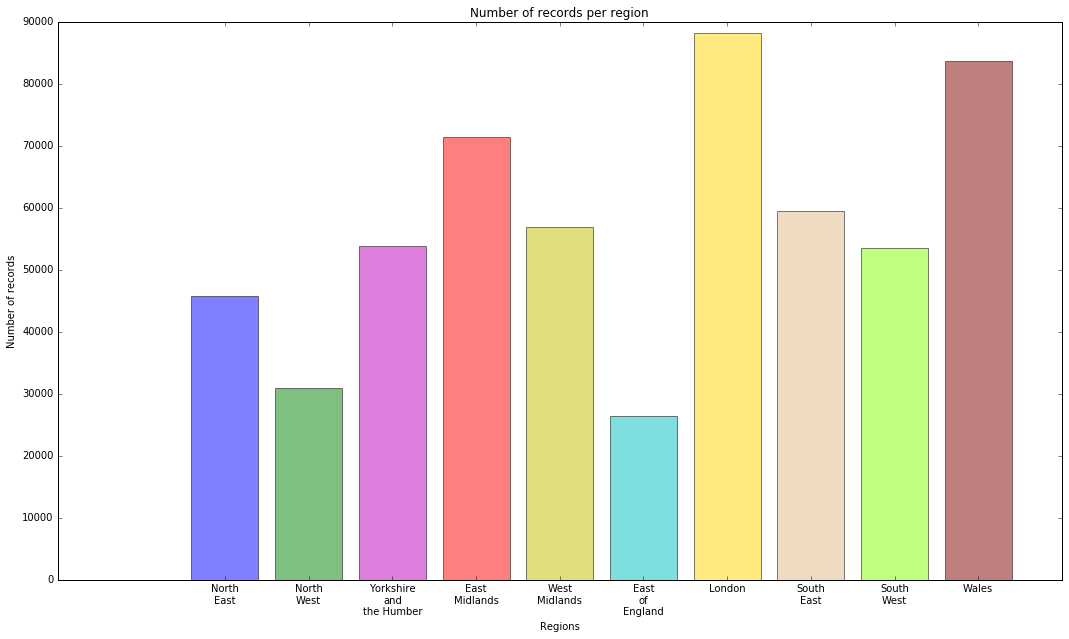

In [72]:
make_bar_chart(["E12000001", "E12000002", "E12000003", "E12000004", "E12000005", "E12000006",
                "E12000007", "E12000008", "E12000009", "W92000004"], 'Region',
               'Number of records per region', 'Regions', 'Number of records', 
               ["North\nEast", "North\nWest","Yorkshire\nand\nthe Humber", "East\nMidlands", 
                "West\nMidlands","East\nof\nEngland", "London","South\nEast", "South\nWest", 
                "Wales"], df)

Make a bar chart for occupations. 

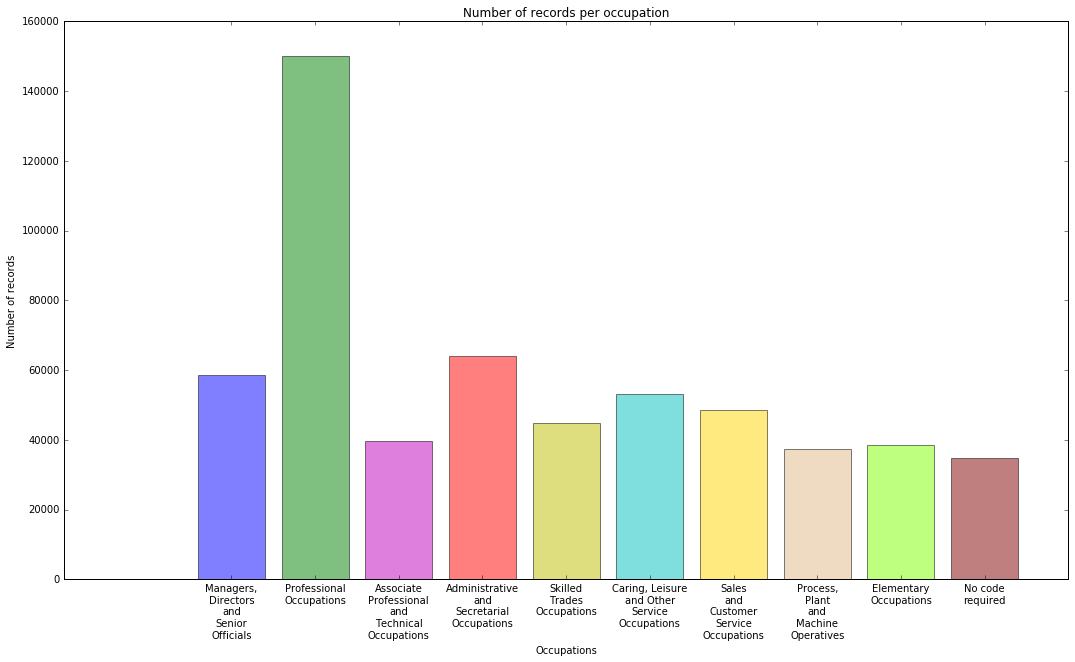

In [73]:
make_bar_chart([-9] + list(range(1, 10)), 'Occupation', 'Number of records per occupation',
               'Occupations', 'Number of records',
               ["Managers,\nDirectors\nand\nSenior\nOfficials",
                "Professional\nOccupations",
                "Associate\nProfessional\nand\nTechnical\nOccupations",
                "Administrative\nand\nSecretarial\nOccupations",
                "Skilled\nTrades\nOccupations",
                "Caring, Leisure\nand Other\nService\nOccupations",
                "Sales\nand\nCustomer\nService\nOccupations",
                "Process,\nPlant\nand\nMachine\nOperatives",
                "Elementary\nOccupations",
                "No code\nrequired"], df)

Function used to make a pie chart. In a similar way to the above function, groupby is used to get the number of records, which are then plotted on a pie chart using matplotlib. The colours are set to be unique so that the legend can be used to make the data more clear, however we have found that each computer in the labs interprets this differently, and therefore sometimes the colours are not unique. With the following code, it seems to work the best. 

In [74]:
# function which makes a pie chart based on number of records that have the same
# value for the given column name. Possible values are given as a list, and
# another list of text to show what each value means
def make_pie_chart(array_of_values, col_name, text_array, df):
    if not type(array_of_values) == list or not type(col_name) == str:
        return
    # get the details of the column
    column = df.groupby(col_name)
    # create a list of the number of records that have the same value for the column
    record_numbers = column.size().tolist()
    # if the possible values array size is not equal to the size of the array of records,
    # some values were missed (as no records use them), so we must add them on with value 0
    if len(array_of_values) != len(record_numbers):
        for x in range(0, len(array_of_values) - len(record_numbers)):
            # add the missing record with a value of 0
            record_numbers += [0]
    # set the colours of the pie chart, trying to make them unique, by creating an array of unique colours
    colours = []
    colour_array = ['b', 'g', 'm', 'r', 'y', 'c', 'gold', 'burlywood', 'chartreuse',
                    'maroon', 'fuchsia', 'teal', 'pink', 'grey', 'orange', 'brown', 'w']
    for x in range(0, len(array_of_values)):
        colours += [colour_array[x]]
    colours = np.array(colours)

    # root.mainloop()
    # set the size of the window with the pie chart
    plt.figure(figsize=(18, 10))
    # add the record numbers to the pie chart along with the colours
    plt.pie(record_numbers, colors=colours, autopct='%1.1f%%', shadow=True, startangle=140)
    # add a legend to explain what each variable means
    plt.legend(text_array, loc="upper right")
    plt.axis('equal')
    plt.show()

Make a pie chart for the age variable. 

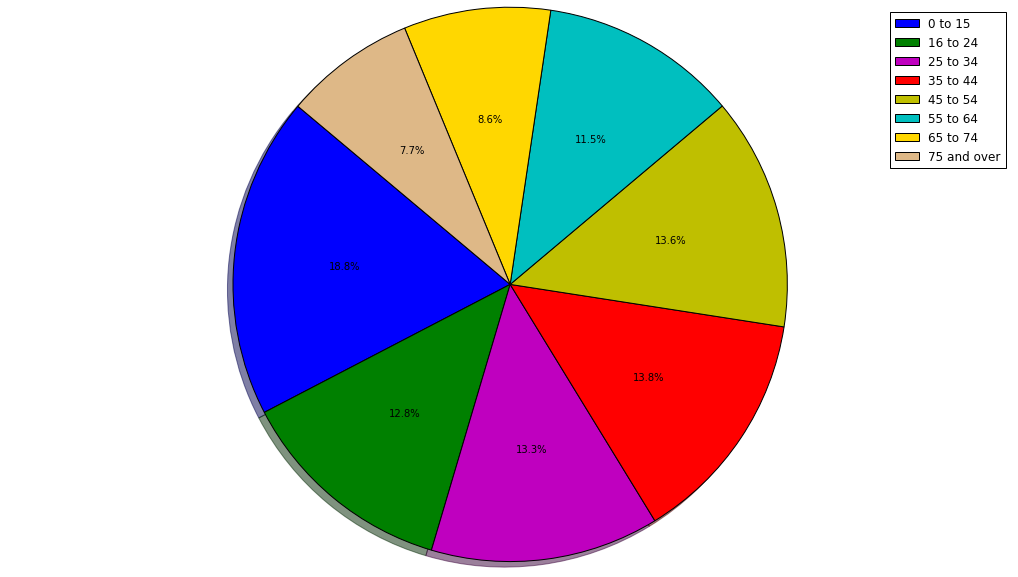

In [75]:
make_pie_chart(list(range(1, 9)), 'Age', TEXT_ARRAY[6][1], df)

Make a pie chart for the economic activity variable. 

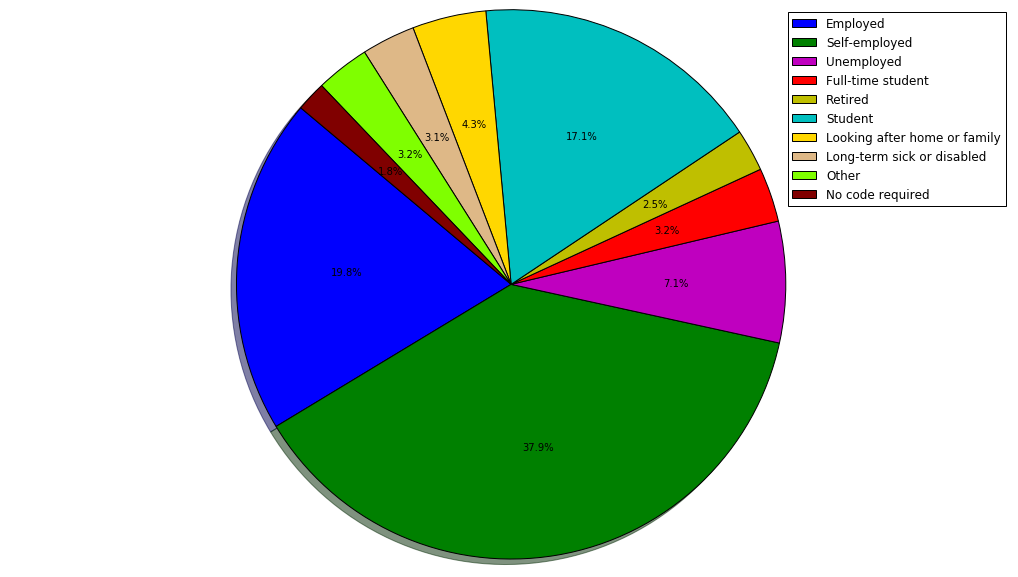

In [76]:
make_pie_chart([-9] + list(range(1, 10)), 'Economic Activity',
               TEXT_ARRAY[13][1], df)

The following function contains the implementation for the first Easy extension. It is used to make a table, using the texttable library. Similarly to the above functions, groupby is used to get the number of records per variable value, and a list of tuples is created. The first value of this tuple is the first variable name, and the second is the second variable name. The total number of records is held in table_values. Once the correct number of 0s have been added to the values (to not ignore variable values that didn't have records), the function uses texttable to print the heading of the table (first variable values), and then all the rows with the values (the first of which is the second variable value). Finally, the actual text explanations for the variables are used rather than just the values on the table, in order to meet the requirements. 

In [77]:
import operator
import texttable as tt


# function to create a table, showing the number of records that have the same
# values for a two given columns. The first column is col, the second is row (as it is
# displayed in this way on a table). The two arrays are the possible values of these columns,
# the table name is the title of the table, and the text arrays represent what each value means
def make_table(col, row, array_of_values_col, array_of_values_row, table_name, col_text_array,
               row_text_array, df):
    if not type(col) == str or not type(row) == str or not type(array_of_values_col) == list \
            or not type(array_of_values_row) == list or not type(table_name) == str:
        return
    # try and print out the table name in around the centre of the table at the top
    for x in range(0, len(array_of_values_col) * 60 // len(table_name)):
        table_name = " " + table_name
    print(table_name + '\n')
    # get the number of records that have the same values for the given columns as a list
    table_values = df.groupby([col, row]).size().tolist()
    # get a list of tuples containing the key and value, and sort by value
    table_headings = sorted(df.groupby([col, row]).groups.keys(), key=operator.itemgetter(1))
    # sort the same list by key, so it is properly sorted now
    table_headings = sorted(table_headings, key=operator.itemgetter(0))
    # keep track of where we are in the table values
    counter = 0
    # add 0s in the right places for the missing values
    # go through each item of the first array
    for item in array_of_values_col:
        # go through each item of the second array
        for val in array_of_values_row:
            # if the given tuple of items isn't in the list
            if (item, val) not in table_headings:
                # add a 0 on to the array of all the values in the right place
                table_values.insert(counter, 0)
            counter += 1
    # use texttable to create a nice table
    table = tt.Texttable()
    # insert a blank line at the start (as the first column will have the row names)
    new_heading = col_text_array
    new_heading.insert(0, " ")
    # add the header of the table, which will be the textual representation of the possible values
    # for the first column
    table.header(new_heading)
    # for the first row, add the first value of the row text array
    new_row = [row_text_array[0]]
    # keep track of the rows added
    counter = 1
    # go through all the values in the table of values and add them to each row on the table
    for x in range(0, len(table_values)):
        # if the length of the row is the length of the possible values of the first column
        if len(new_row) == len(new_heading):
            # add the row to the table
            table.add_row(new_row)
            # set the new row equal to the name of the next value in the text array
            new_row = [row_text_array[counter]]
            counter += 1
        # add the next value to the row
        new_row.append(table_values[x])
        x += 1
    # print the table
    s = table.draw()
    print(s)
    print('\n\n\n')

Create a table for number of records by regions and industry. The long lists in the arguments contain the explanations to each variable value in the given variable. 

In [78]:
make_table('Region', 'Industry', ["E12000001", "E12000002", "E12000003", "E12000004",
                                  "E12000005", "E12000006", "E12000007", "E12000008",
                                  "E12000009", "W92000004"], [-9] + list(range(1, 13)),
           "NUMBER OF RECORDS BY REGION AND INDUSTRY", 
           TEXT_ARRAY[1][1],
           TEXT_ARRAY[15][1], df)

               NUMBER OF RECORDS BY REGION AND INDUSTRY

+--------------+-------+-------+-------------+--------+--------+---------+-----+-------+-------+----+
|              | North | North |  Yorkshire  | East M | West M | East of | Lon | South | South | Wa |
|              | East  | West  |   and the   | idland | idland | England | don | East  | West  | le |
|              |       |       |   Humber    |   s    |   s    |         |     |       |       | s  |
+==============+=======+=======+=============+========+========+=========+=====+=======+=======+====+
| Agriculture  | 6854  | 132   | 2851        | 1574   | 3087   | 1300    | 143 | 524   | 1883  | 14 |
|              |       |       |             |        |        |         | 8   |       |       | 98 |
+--------------+-------+-------+-------------+--------+--------+---------+-----+-------+-------+----+
| Manufacturin | 1836  | 2524  | 848         | 18755  | 357    | 7726    | 377 | 9016  | 3355  | 39 |
| g            |       | 

Make a table for number of records by occupation and social grade. 

In [79]:
make_table('Occupation', 'Approximated Social Grade', [-9, 1, 2, 3, 4, 5, 6, 7, 8, 9],
           [-9, 1, 2, 3, 4], "NUMBER OF RECORDS BY OCCUPATION AND SOCIAL GRADE", 
           TEXT_ARRAY[14][1],
           TEXT_ARRAY[17][1], df)

            NUMBER OF RECORDS BY OCCUPATION AND SOCIAL GRADE

+---+-----+-------+------------------+--------+--------+-------------+----+-----+------+---------+
|   | Man | Profe |    Associate     | Admini | Skille |   Caring,   | Sa | Pro | Elem | No code |
|   | age | ssion | Professional and | strati |   d    | Leisure and | le | ces | enta | require |
|   | rs  |  al   |    Technical     |   ve   | Trades |    Other    | s  |  s  |  ry  |    d    |
+===+=====+=======+==================+========+========+=============+====+=====+======+=========+
| A | 116 | 1051  | 17787            | 2062   | 12169  | 492         | 19 | 185 | 584  | 967     |
| B | 915 |       |                  |        |        |             | 19 | 55  |      |         |
|   |     |       |                  |        |        |             | 0  |     |      |         |
+---+-----+-------+------------------+--------+--------+-------------+----+-----+------+---------+
| C | 884 | 48104 | 13223            | 891    |

The following cell contains the implementation to the first Medium extension, which is to create 3d plots for the tables used above. The mpl_toolkits.mplot3d library was used. To get the values for each variable, the same method was used as in the make_table function, using groupby and by using a list of values, and a list of tuples (for the variable values). Once this was done, the x axis was assigned to a list of values of the first variable, the y axis to the second variable, and the z axis to the number of records. Using the numpy library, the arrays are re-shaped to fit on the grid, and then the plot is drawn. 

In [80]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# function to make a 3d plot where one axis is the given column name's possible values,
# the second is the same for the second column (row), and the third is the number of records
# that have the same values for the given columns. The arrays given represent the
# possible values that these columns can have
def make_3d(col, row, array_of_values_col, array_of_values_row, col_text_array,
               row_text_array, df):
    if not type(col) == str or not type(row) == str or not type(array_of_values_col) == list \
            or not type(array_of_values_row) == list:
        return
    # get the number of records that have the same values for the given columns as a list
    values = df.groupby([col, row]).size().tolist()
    # get a list of tuples containing the key and value, and sort by value
    axes_values = sorted(df.groupby([col, row]).groups.keys(), key=operator.itemgetter(1))
    # sort the same list by key, so it is properly sorted now
    axes_values = sorted(axes_values, key=operator.itemgetter(0))
    # keep track of where we are in the values
    counter = 0
    # add 0s in the right places for the missing values
    # go through each item of the first array
    for item in array_of_values_col:
        # go through each item of the second array
        for val in array_of_values_row:
            # if the given tuple of items isn't in the list
            if (item, val) not in axes_values:
                # add a 0 on to the array of all the values in the right place
                values.insert(counter, 0)
            counter += 1
    # create the figure, set the size
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(111, projection='3d')
    # add the right values to the x and y axes
    x = list(range(0, len(array_of_values_col)))
    y = list(range(0, len(array_of_values_row)))
    # re-shape the axes
    X, Y = np.meshgrid(x, y)
    # set the z axis to the array of values
    zs = np.array(values)
    # re-shape to fit in the axis
    Z = zs.reshape(X.shape)

    ax.plot_surface(X, Y, Z)
    # set the axes values
    ax.set_xticks(x)
    ax.set_yticks(y)
    # set the axes labels
    ax.set_xticklabels(np.array(col_text_array))
    ax.set_yticklabels(np.array(row_text_array))
    # set the names of the axes
    ax.set_xlabel("\n\n\n\n\n\n" + str(col))
    ax.set_ylabel("\n\n\n\n\n\n" + str(row))
    ax.set_zlabel('Number of Records')

    plt.show()

Create a 3d plot for number of records by regions and industry. The long lists in the arguments contain the explanations to each variable value in the given variable. 

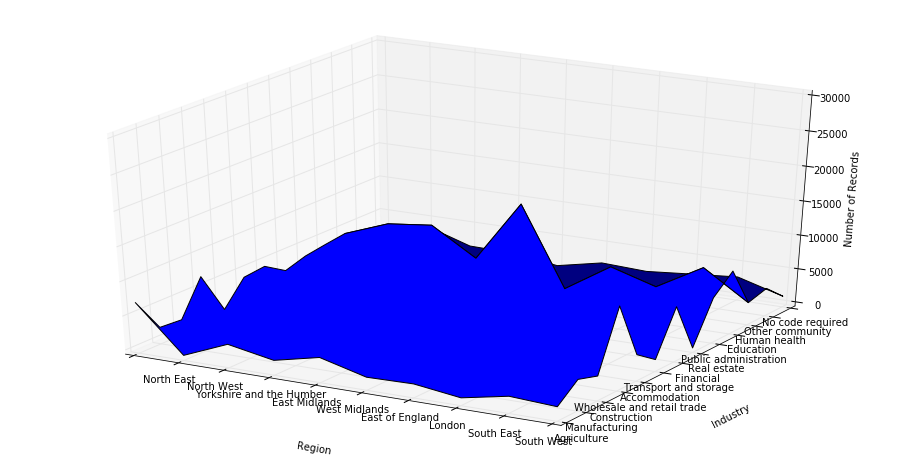

In [81]:
make_3d('Region', 'Industry', ["E12000001", "E12000002", "E12000003", "E12000004",
                               "E12000005", "E12000006", "E12000007", "E12000008",
                               "E12000009", "W92000004"], [-9] + list(range(1, 13)), 
           TEXT_ARRAY[1][1],
           TEXT_ARRAY[15][1], df)

Make a 3d plot for number of records by occupation and social grade. 

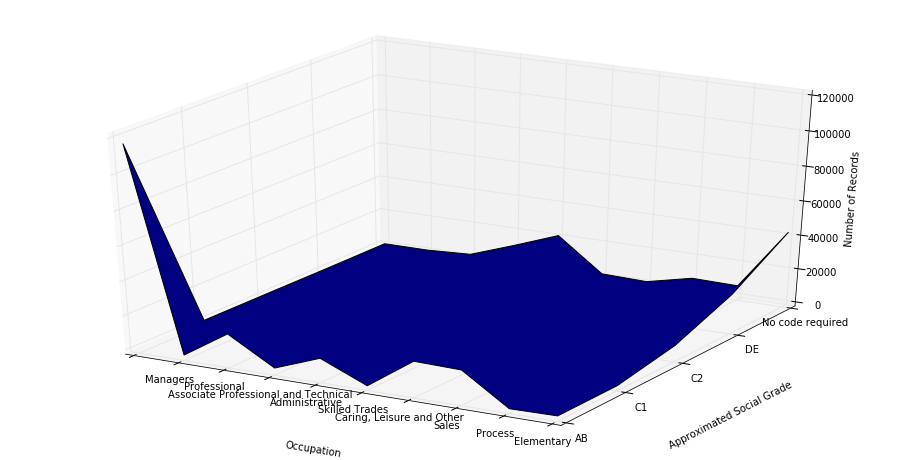

In [82]:
make_3d('Occupation', 'Approximated Social Grade', [-9, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [-9, 1, 2, 3, 4], 
        TEXT_ARRAY[14][1],
        TEXT_ARRAY[17][1], df)

The following cell implements the second Easy extension, which is to make plots based on different queries. A bar chart representation was used. The function is the same as the one above to make a bar chart, except it takes in 2 more arguments: a variable name, and the list of values that the records should have for that variable to pass the query. This is implemented when the values are found using groupby, so only the records that match the query are counted. 

In [83]:
# function just like the one above, except the bar chart created has an added query to it
# which the records must follow, therefore the function takes in the column name of the query
# and the range that the records' values must be in (for the given column)
def make_bar_chart_query(array_of_values, col_name, plot_name, xname, yname,
                         query_col_name, query_range, text_array, df):
    if not type(array_of_values) == list or not type(col_name) == str or \
            not type(plot_name) == str or not type(xname) == str or not type(yname) == str \
            or not type(query_col_name) == str or not type(query_range) == list:
        return
    # get the details of the column with the query applied, making sure the records
    # counted follow the query
    column = df.loc[df[query_col_name].isin(query_range)].groupby(col_name)
    # make a list of tuples, where the first value is the name/key of the variable, and the
    # second is how many records have that value
    records = list(zip(list(column[col_name].groups.keys()), column.size().tolist()))
    # make a list of just the names/keys in the column
    record_names = list(column[col_name].groups.keys())
    # if the possible values array size is not equal to the size of the array of records,
    # some values were missed (as no records use them), so we must add them on with value 0
    if len(records) != len(array_of_values):
        for record in array_of_values:
            if record not in record_names:
                # add the missing record with a value of 0
                records += [(record, 0)]
    # set the colours of the bar chart, trying to make them unique, by creating an array of unique colours
    colours = []
    colour_array = ['b', 'g', 'm', 'r', 'y', 'c', 'gold', 'burlywood', 'chartreuse',
                    'maroon', 'fuchsia', 'teal', 'pink', 'grey', 'orange', 'brown', 'w']
    for x in range(0, len(array_of_values)):
        colours += [colour_array[x]]
    colours = np.array(colours)
    # sort the records
    records.sort(key=lambda x: x[0])
    # re-fill the names array, and fill in a values array
    record_names = []
    record_values = []
    for (x, y) in records:
        record_names.append(x)
        record_values.append(y)
    ind = range(len(records))
    # set the size of the window with the bar chart
    plt.figure(figsize=(18, 10))
    # assign the values to the bar chart
    plt.bar(ind, record_values, align='center', alpha=0.5, color=colours)
    # on the x-axis, the labels should be the textual representation of the variable values
    plt.xticks(ind, text_array)
    # fill in the names of the axes and the title of the chart
    plt.ylabel(yname)
    plt.xlabel(xname)
    plt.title(plot_name)
    plt.show()

Make a bar chart of number of economically active people (economic activity 1-4) by region. 

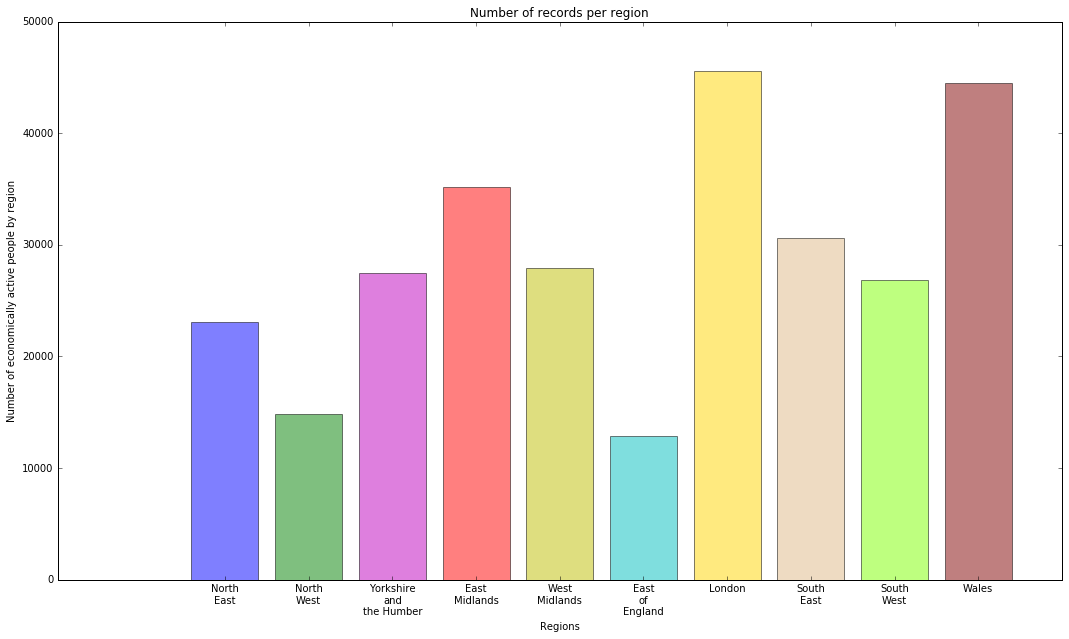

In [84]:
make_bar_chart_query(["E12000001", "E12000002", "E12000003", "E12000004", "E12000005", "E12000006",
                      "E12000007", "E12000008", "E12000009", "W92000004"], 'Region',
                     'Number of records per region', 'Regions',
                     'Number of economically active people by region', 'Economic Activity',
                     list(range(1, 5)), 
                     ["North\nEast", "North\nWest", "Yorkshire\nand\nthe Humber",
                      "East\nMidlands", "West\nMidlands", "East\nof\nEngland", "London",
                      "South\nEast", "South\nWest", "Wales"], df)

Make a bar chart of number of economically active people (economic activity 1-4) by age. 

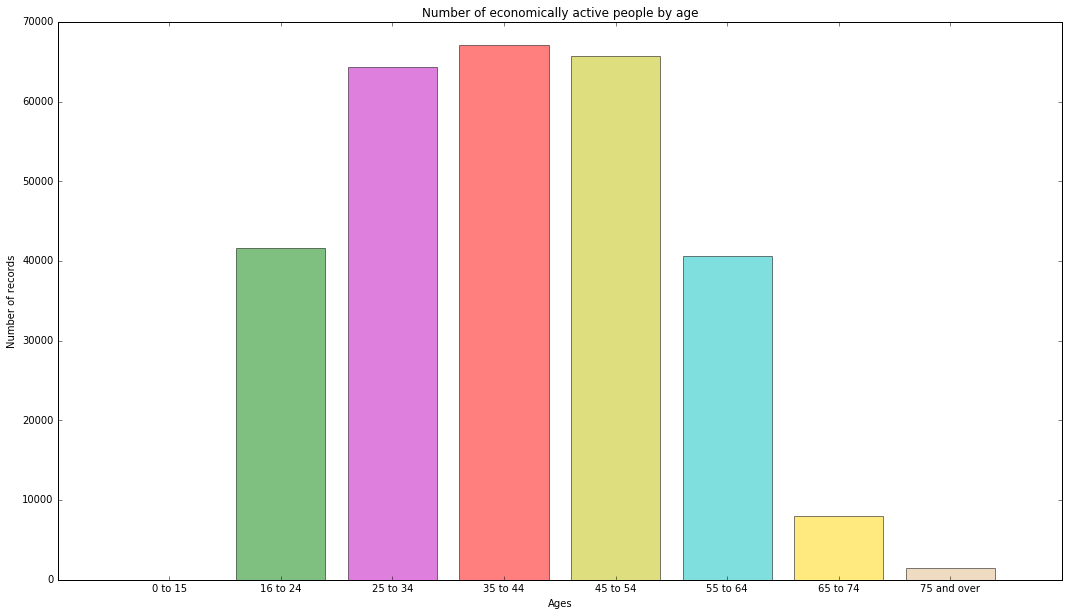

In [85]:
make_bar_chart_query(list(range(1, 9)), 'Age',
                     'Number of economically active people by age', 'Ages', 'Number of records',
                     'Economic Activity', list(range(1, 5)), 
                     TEXT_ARRAY[6][1], df)

Make a bar chart of number of working hours per week for students (economic activity 4 or 6)

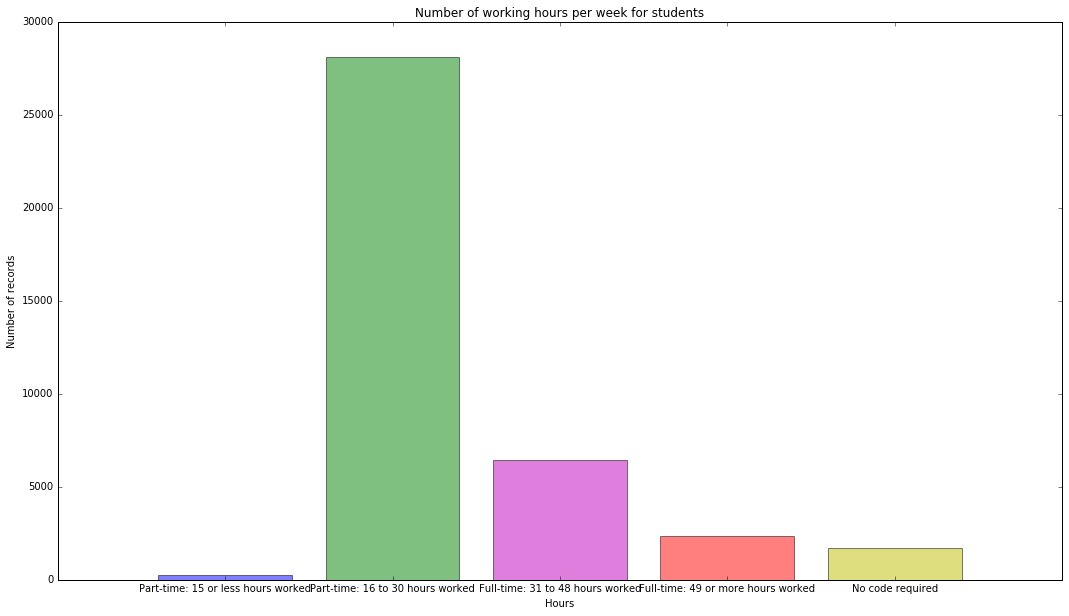

In [86]:
make_bar_chart_query([-9] + list(range(1, 5)), 'Hours worked per week',
                     'Number of working hours per week for students', 'Hours',
                     'Number of records', 'Economic Activity', [4, 6], 
                    TEXT_ARRAY[16][1], df)

Make a bar chart to check for discrepancies between the student status given as a yes/no answer
to the question Student (Schoolchild or full-time student) and answers on the question on
Economic activity (should be 4 or 6 if they are a student, which is the query). So, any records displayed that aren't students (value 2) have a discrepancy. 

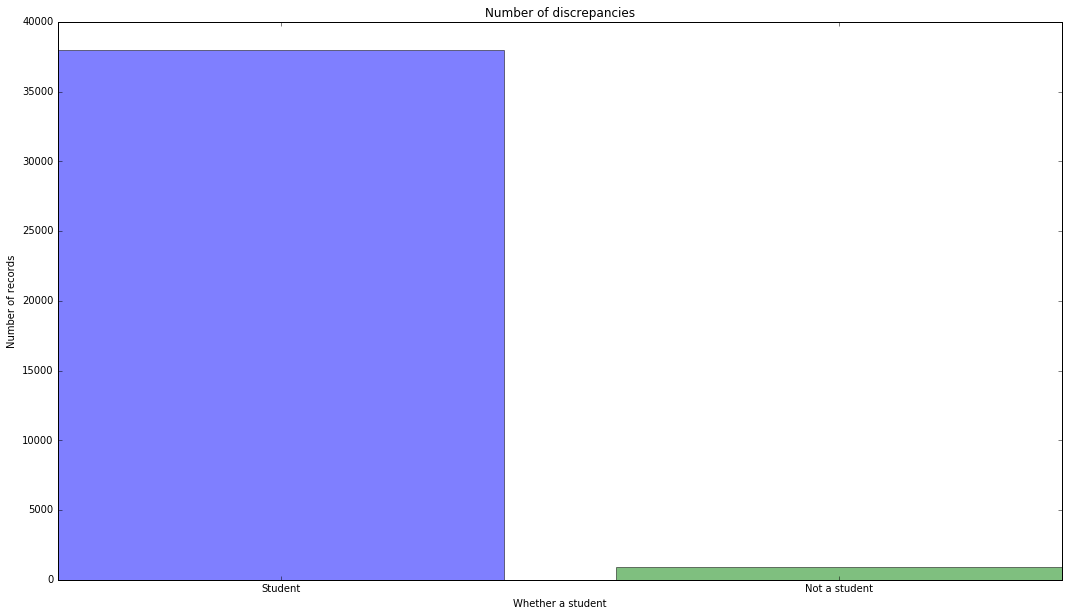

In [87]:
make_bar_chart_query([1, 2], 'Student',
                     'Number of discrepancies', 'Whether a student',
                     'Number of records', 'Economic Activity', [4, 6], TEXT_ARRAY[8][1], df)

Similar to the above command, make a bar chart to check for discrepancies between the student status given as a yes/no answer to the question Student (Schoolchild or full-time student) and answers on the question on
Economic activity (should not be 4 or 6 if they are not a student, which is the query). So, any records displayed that are students (value 1) have a discrepancy. 

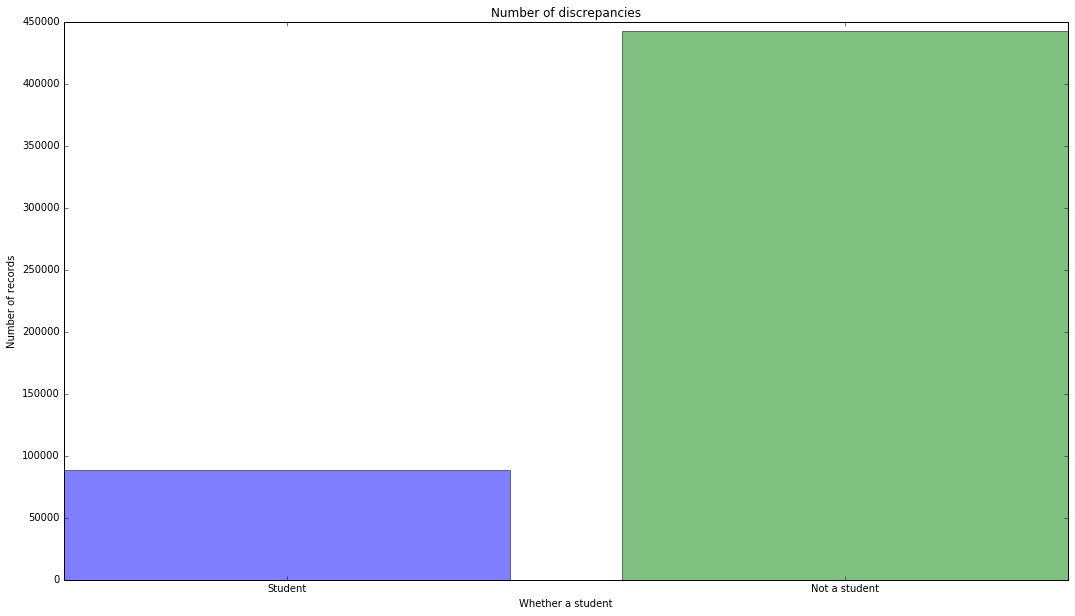

In [88]:
make_bar_chart_query([1, 2], 'Student',
                     'Number of discrepancies', 'Whether a student',
                     'Number of records', 'Economic Activity', [-9, 1, 2, 3, 5, 7, 8, 9], TEXT_ARRAY[8][1], df)

Implementation for the 2nd Medium extension, which is to use ipywidgets to get different record numbers. This is how we interpreted the extension, because we didn't think it would make sense to create a plot based on 2 values (e.g. 1 region, 1 industry). Therefore, this function creates one dropdown widget and one selection slider widget (as the selection isn't always an exact range of values), and based on the selected values, prints out the number of records that have both those values. Firstly, the widgets are created, and then a similar implementation to the make_table function is used to create an array of all the record numbers, and an array of tuples containing the values of each variable. When the "select" option is picked from the dropdown widget, nothing is printed. As soon as this changes, or if the slider changes value, the change_num function is called, which finds the appropriate index in the array of tuples where the 2 values are located, and prints the number at the same index in the array of record numbers, as this will be the appropriate value. 

In [89]:
from ipywidgets import widgets 
from IPython.display import display
import operator


def get_value_with_widgets(col, row, array_of_values_col, array_of_values_row, df):
    
    dropdown = widgets.Dropdown(options=["Select"] + array_of_values_col, 
                                description=col + ": ",
                                value="Select")
    slider = widgets.SelectionSlider(options=array_of_values_row, description=row + ": ")
    display(dropdown)
    display(slider)
    # get the number of records that have the same values for the given columns as a list
    table_values = df.groupby([col, row]).size().tolist()
    # get a list of tuples containing the key and value, and sort by value
    table_headings = sorted(df.groupby([col, row]).groups.keys(), key=operator.itemgetter(1))
    # sort the same list by key, so it is properly sorted now
    table_headings = sorted(table_headings, key=operator.itemgetter(0))
    # keep track of where we are in the table values
    counter = 0
    # add 0s in the right places for the missing values
    # go through each item of the first array
    for item in array_of_values_col:
        # go through each item of the second array
        for val in array_of_values_row:
            # if the given tuple of items isn't in the list
            if (item, val) not in table_headings:
                # add a 0 on to the array of all the values in the right place
                table_values.insert(counter, 0)
            counter += 1
    # Define function to bind value of the input to the output variable

    def change_num(change):
        if change['type'] == 'change' and change['name'] == 'value' and dropdown.value != "Select":
            col_row_value = (dropdown.value, slider.value)
            counter = -1
            for x in range(0, len(table_headings)):
                if table_headings[x] == col_row_value:
                    counter = x
                    break
            if counter != -1:
                print(str(col_row_value) + " = " + str(table_values[counter]) + " records")               
    dropdown.observe(change_num)
    slider.observe(change_num)

Create widgets for region and industry, interacting with them prints out the number of records for the chosen values. 

In [90]:
get_value_with_widgets('Region', 'Industry', 
                       ["E12000001", "E12000002", "E12000003", "E12000004",
                        "E12000005", "E12000006", "E12000007", "E12000008",
                        "E12000009", "W92000004"], 
                       [-9] + list(range(1, 13)), df)

The same function as the above, except it creates 2 selection sliders rather than 1 dropdown and 1 selection slider. This was done to create some variety and give the user options on what type of representation they want to use. 

In [91]:
def get_value_with_widgets2(col, row, array_of_values_col, array_of_values_row, df):
    
    slider = widgets.SelectionSlider(options=["Select"] + array_of_values_col, 
                                description=col + ": ")
    slider2 = widgets.SelectionSlider(options=array_of_values_row, description=row + ": ")
    display(slider)
    display(slider2)
    # get the number of records that have the same values for the given columns as a list
    table_values = df.groupby([col, row]).size().tolist()
    # get a list of tuples containing the key and value, and sort by value
    table_headings = sorted(df.groupby([col, row]).groups.keys(), key=operator.itemgetter(1))
    # sort the same list by key, so it is properly sorted now
    table_headings = sorted(table_headings, key=operator.itemgetter(0))
    # keep track of where we are in the table values
    counter = 0
    # add 0s in the right places for the missing values
    # go through each item of the first array
    for item in array_of_values_col:
        # go through each item of the second array
        for val in array_of_values_row:
            # if the given tuple of items isn't in the list
            if (item, val) not in table_headings:
                # add a 0 on to the array of all the values in the right place
                table_values.insert(counter, 0)
            counter += 1
    # Define function to bind value of the input to the output variable

    def change_num(change):
        if change['type'] == 'change' and change['name'] == 'value' and slider.value != "Select":
            col_row_value = (slider.value, slider2.value)
            counter = -1
            for x in range(0, len(table_headings)):
                if table_headings[x] == col_row_value:
                    counter = x
                    break
            if counter != -1:
                print(str(col_row_value) + " = " + str(table_values[counter]) + " records")               
    slider.observe(change_num)
    slider2.observe(change_num)

Create widgets for occupation and social grade, interacting with them prints out the number of records for the chosen values. 

In [92]:
get_value_with_widgets2('Occupation', 'Approximated Social Grade', [-9, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                        [-9, 1, 2, 3, 4], df)

The following functions are used to implement the first hard extension, which is to create an interactive map, where the user can select a region. This will display a pie chart based on a variable, selected by the user, using a dropdown widget, which is an extension to the extension. The image used as the background has been downloaded from google images. The tkinter library was used to create the GUI. 
When using the make_map function, make sure to close the map before selecting a value from the dropdown list, as only 1 region can be selected each time this is run. 

In [93]:
from tkinter import *

# list of all the variables
variable_list = []
# list of range of values for specific variable
range_list = []
# populate the variable list
for (x, y) in DATA_ARRAY:
    if y:
        variable_list += [x]

# create the dropdown widget with the options
dropdown = widgets.Dropdown(options=["Select"] + variable_list, 
                            description="Variable: ",
                            value="Select")


# function which makes a pie chart based on number of records that have the same
# value for the given column name. Possible values are given as a list, and
# another list of text to show what each value means. Finally, there is an added query, 
# meaning the record numbers are only counted for the records that pass the query. The query will
# always be based on the region the way it is used with the map
def make_pie_chart_query(array_of_values, col_name, text_array, query_col_name, query_range, df):
    if not type(array_of_values) == list or not type(col_name) == str:
        return
    # get the details of the column with the added query
    column = df.loc[df[query_col_name].isin(query_range)].groupby(col_name)
    # create a list of the number of records that have the same value for the column
    record_numbers = column.size().tolist()
    # if the possible values array size is not equal to the size of the array of records,
    # some values were missed (as no records use them), so we must add them on with value 0
    if len(array_of_values) != len(record_numbers):
        for x in range(0, len(array_of_values) - len(record_numbers)):
            # add the missing record with a value of 0
            record_numbers += [0]
    # set the colours of the pie chart, trying to make them unique, by creating an array of unique colours
    colours = []
    colour_array = ['b', 'g', 'm', 'r', 'y', 'c', 'gold', 'burlywood', 'chartreuse',
                    'maroon', 'fuchsia', 'teal', 'pink', 'grey', 'orange', 'brown', 'w']
    for x in range(0, len(array_of_values)):
        colours += [colour_array[x]]
    colours = np.array(colours)

    # root.mainloop()
    # set the size of the window with the pie chart
    plt.figure(figsize=(10, 8))
    # add the record numbers to the pie chart along with the colours
    plt.pie(record_numbers, colors=colours, autopct='%1.1f%%', shadow=True, startangle=140)
    # add a legend to explain what each variable means
    plt.legend(text_array, loc="upper right")
    plt.axis('equal')
    plt.show()
    

# callback function for when a region is chosen
def button_clicked(region_code):
    
    # function to create a pie chart when a value is selected from the dropdown list
    def show_chart(change):
        # make sure 'Select' isn't selected
        if change['type'] == 'change' and change['name'] == 'value' and change['new'] != "Select":
            range_list = []
            text = []
            # populate the range list by finding the right one from the DATA_ARRAY
            for (x, y) in DATA_ARRAY:
                if y and x == change['new']:
                    range_list = y
                    break
            # similarly, populate the text list
            for (w, z) in TEXT_ARRAY:
                if w == change['new']:
                    text = z
                    break
            # make the pie chart with the selected region (this is the query)
            make_pie_chart_query(range_list, change['new'], text, 'Region', [region_code], df)
    
    dropdown.observe(show_chart)
    display(dropdown)
    

# create the GUI with the map and the buttons on the regions
def make_map():
    window = Tk()
    window.title("map")
    # set image as background image
    bg_image = PhotoImage(file="../data/uk_map_regional_consortia_web.gif")
    x = Label(image=bg_image)
    x.grid(row=0, column=0)
    # create all the buttons, the abbreviations in their names represent their region (NE = North East)
    # the x and y values for the buttons are exact and place the buttons on their appropriate regions
    bNE = Button(window, text="NORTH\nEAST", width=3,
                 command=lambda: button_clicked("E12000001"),
                 background='lightblue', activebackground='red')
    bNE.place(relx=.6, rely=.15, anchor="c")
    bNW = Button(window, text="NORTH\nWEST", width=3,
                 command=lambda: button_clicked("E12000002"),
                 background='lightblue', activebackground='red')
    bNW.place(relx=.465, rely=.2, anchor="c")
    bYH = Button(window, text="YORKSHIRE\nAND THE\nHUMBER", width=8,
                 command=lambda: button_clicked("E12000003"),
                 background='lightblue', activebackground='red')
    bYH.place(relx=.67, rely=.33, anchor="c")
    bEM = Button(window, text="EAST\nMIDLANDS", width=6,
                 command=lambda: button_clicked("E12000004"),
                 background='lightblue', activebackground='red')
    bEM.place(relx=.7, rely=.5, anchor="c")
    bWM = Button(window, text="WEST\nMIDLANDS", width=6,
                 command=lambda: button_clicked("E12000005"),
                 background='lightblue', activebackground='red')
    bWM.place(relx=.5, rely=.58, anchor="c")
    bEE = Button(window, text="EAST\nENGLAND", width=7,
                 command=lambda: button_clicked("E12000006"),
                 background='lightblue', activebackground='red')
    bEE.place(relx=.85, rely=.65, anchor="c")
    bL = Button(window, text="LONDON", width=4,
                command=lambda: button_clicked("E12000007"),
                background='lightblue', activebackground='red')
    bL.place(relx=.75, rely=.77, anchor="c")
    bSE = Button(window, text="SOUTH\nEAST", width=8,
                 command=lambda: button_clicked("E12000008"),
                 background='lightblue', activebackground='red')
    bSE.place(relx=.7, rely=.878, anchor="c")
    bSW = Button(window, text="SOUTH\nWEST", width=8,
                 command=lambda: button_clicked("E12000009"),
                 background='lightblue', activebackground='red')
    bSW.place(relx=.33, rely=.85, anchor="c")
    bW = Button(window, text="\nWALES\n", width=6,
                command=lambda: button_clicked("W92000004"),
                background='lightblue', activebackground='red')
    bW.place(relx=.30, rely=.62, anchor="c")
    window.mainloop()

Use the above function to create a map. When a region is selected, make sure to close the map before selecting a value from the dropdown list, as it will only be triggered when the map is closed. Therefore, only 1 region can be selected each time this is run. 

In [94]:
make_map()

The following cell contains the implementation for the 2nd hard extension, which is to analyse other data sets. 
Due to our previous functions being reproduceable/reusable, all that needs to be done is to create a data array with the new variables and their details, a new refined file and a new filename. The commands are the same and the same functions are used as before. Of course, all of the above functions 

In [95]:
# array of data for schoolattendance.csv, each variable with possible range of values per tuple
DATA_ARRAY2 = [('GeographyCode', []),
              ("DateCode", ["2003-2004", "2004-2005", "2005-2006", "2006-2007", "2007-2008", "2008-2009", "2009-2010", "2010-2011"]),
              ("Measurement", ["Ratio"]),
              ("Units", ["Percentage"]),
              ("Value", [round(x * 0.01, 2) for x in range(0, 10001)]),
              ("School Type", ["Primary", "Secondary"])]
refined_file2 = open("../data/refined_data_2.csv", "w+")
filename2 = "../data/schoolattendance.csv"

Similarly as before, simply read in the new file using pandas and check that the file is legal

In [96]:
df2 = pd.read_csv(filename2)
check_file(DATA_ARRAY2, df2)

All records are legal - no new file needed 




Perform data analysis on the new file

In [97]:
data_analysis(DATA_ARRAY2, filename2, df2)

Number of Records: 135252 
 

Data Type Breakdown: 

GeographyCode     object
DateCode          object
Measurement       object
Units             object
Value            float64
School Type       object
dtype: object


Number of Each Data Type:


DateCode
2003-2004    16808
2004-2005    16917
2005-2006    16917
2006-2007    16922
2007-2008    16922
2008-2009    16922
2009-2010    16922
2010-2011    16922
dtype: int64

Measurement
Ratio    135252
dtype: int64

Units
Percentage    135252
dtype: int64

Value
0.00      34
46.36      2
50.69      1
55.88      1
57.11      1
58.10      1
59.11      1
59.47      4
64.65      1
65.07      1
65.46      1
65.53      1
65.96      1
66.01      1
66.19      1
66.59      2
67.02      1
67.17      1
67.33      1
67.84      1
68.12      1
68.26      1
68.41      2
68.50      1
68.59      1
69.57      1
70.20      1
70.34      1
70.36      1
70.41      1
          ..
99.06      2
99.08      1
99.09      1
99.10      1
99.12      1
99.13      4
99.14   

<b><u>Conclusion</b></u>

    Overall, we have shown a clear understanding of python and an extensive use of multiple libraries,
    including pandas, matplotlib, texttable, numpy, and many more. We have implemented all of the basic
    requirements and all of the extensions except one, stating in this jupyter notebook our decisions 
    and our interpretations of the requirements, before the cell containing the appropriate information. 
    
    We have ensured that our functions are as reproduceable and reusable as possible, which is proved 
    with the 2nd hard extension, where the analysing of a new data set did not require any new functions,
    simply a new array of the new data. Therefore, we are confident that our functions can be used with 
    any data set and are very easy to use. Similarly, the functions that create plots can be used with 
    almost anything, as all they require are arrays of values and axes names, making them very reusable 
    in different projects. 
    
    Apart from the few lines of code that used pandas (which were modified from the lecture notes), all of
    the code was written by us, with the help of the library definitions and documentation on the internet
    (e.g. matplotlib.org). 